**Evaluation of capturing VTK rendered image for display in notebook cell.**

In [1]:
""" Matplotlib imports
"""
import matplotlib
matplotlib.use('Qt4Agg')
%matplotlib notebook

""" RoboPy imports
"""
import _robopy
from robopy.base.graphics import GraphicsRenderer

Using RoboPy module /home/garyd/PycharmProjects/robopy/notebooks/evalVTK/../../robopy.


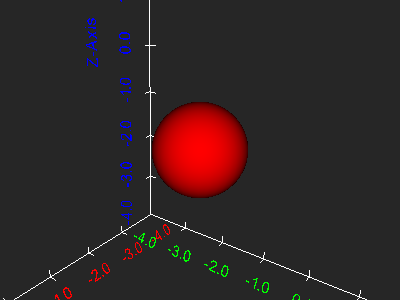

In [2]:
# Select a Graphics Rendering package to use.

gobj = GraphicsRenderer('VTK')  # this sets graphics.gRenderer

# Define some GraphicsVTK parameters which will be used in draw()
# function calls.

dMode = 'IPY'
limits = [-4.0, 4.0, -4.0, 4.0, -4.0, 4.0]

# Draw a red sphere using VTK and display below.

gobj.view(z_up=True, axes=True, limits=limits)
gobj.draw_sphere()
gobj.show(dispMode=dMode)

**Routines to examine execution of preceding draw_sphere script from OS shell in order to examine invocation details**

In [3]:
import os
import sys
import subprocess

#print(sys.path)

if 'BINDER_SERVICE_HOST' in os.environ:
    usr_dir = '../../../jovyan'
    pkg_dir = '/srv/conda/lib/python3.6/site-packages'
    vtk_dir = pkg_dir + '/vtk'
else:
    usr_dir = '/home/garyd'
    pkg_dir = '/usr/local/lib/python3.5/dist-packages'
    vtk_dir = pkg_dir + '/vtk'

In [4]:
def get_env(var):
    if var in os.environ:
        return os.environ[var]
    else:
        return None

def set_env(var, new_val):
    if var in os.environ:
        old_val = os.environ[var]
        if old_val is not None:
            if type(new_val) is type(old_val):
                os.environ[var] = new_val
            else:
                print('Wrong value type: old = %s, new = %s' % \
                          (type(old_val), type(new_val)))
        else:
            os.environ[var] = new_val

def exec_long_running_proc(command, args):
    """
    USE: exec_long_running_proc(command = 'ls', args=['-alF'])
    REF: https://stackoverflow.com/questions/89228/calling-an-external-command-in-python
    """
    cmd = "{} {}".format(command, " ".join(str(arg) if ' ' not in arg else arg.replace(' ','\ ') for arg in args))

    print(cmd)

    process = subprocess.Popen([command]+args, shell=False, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)

    # Poll process for new output until finished
    while True:
        nextline = process.stdout.readline().decode('UTF-8')
        if nextline == '' and process.poll() is not None:
            break
        sys.stdout.write(nextline)
        sys.stdout.flush()

    output = process.communicate()[0]
    exitCode = process.returncode

    if (exitCode == 0):
        return output
    else:
        raise Exception(command, exitCode, output)

ls_cmd   = 'ls'
ls_args  = ['-alF', vtk_dir]
ldd_cmd  = 'ldd'
ldd_args = [vtk_dir + '/vtkRenderingCorePython.so']

In [5]:
exe_cmd  = 'python'
exe_args = ['-u', 'draw_sphere.py']
exec_long_running_proc(exe_cmd, exe_args)

python -u draw_sphere.py
Using RoboPy module /home/garyd/PycharmProjects/robopy/notebooks/evalVTK/../../robopy.
<IPython.core.display.Image object>


b''